In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from math import sqrt

In [52]:
df = pd.read_csv(r'/content/drive/MyDrive/ev_market_raw_dataset.csv')

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# Dimensions and general info
print("Shape of the dataset:", df.shape)
df.info()

# Summary statistics
df.describe(include='all')


Shape of the dataset: (10650, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10650 entries, 0 to 10649
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              10650 non-null  object 
 1   Year                 10650 non-null  int64  
 2   Manufacturer         10650 non-null  object 
 3   EV_Sales_(USD)       10110 non-null  object 
 4   Charging_Stations    9581 non-null   float64
 5   EV_Market_Share(%)   9604 non-null   float64
 6   Total_Vehicles_Sold  10110 non-null  float64
 7   EV_Type              10650 non-null  object 
 8   GDP_per_Capita       10108 non-null  float64
 9   Govt_Incentives      9635 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 832.2+ KB


,Country,Year,Manufacturer,EV_Sales_(USD),Charging_Stations,EV_Market_Share(%),Total_Vehicles_Sold,EV_Type,GDP_per_Capita,Govt_Incentives
count,10650,10650.000000,10650,10110,9581.000000,9604.000000,10110.000000,10650,10108.000000,9635
unique,20,NaN,20,9015,NaN,NaN,NaN,3,NaN,5
top,India,NaN,Ford,"$22,584",NaN,NaN,NaN,PHEV,NaN,no
freq,1104,NaN,1106,4,NaN,NaN,NaN,3599,NaN,2032
mean,NaN,2019.516808,NaN,NaN,2510.889051,15.416608,75377.244708,NaN,39776.044717,NaN
std,NaN,2.872661,NaN,NaN,1439.901132,8.303942,32127.675013,NaN,23011.498012,NaN
min,NaN,2015.000000,NaN,NaN,10.000000,1.000000,1595.000000,NaN,1005.000000,NaN
25%,NaN,2017.000000,NaN,NaN,1283.000000,8.280000,50350.250000,NaN,19376.500000,NaN
50%,NaN,2019.000000,NaN,NaN,2502.000000,15.395000,75291.500000,NaN,39488.000000,NaN
75%,NaN,2022.000000,NaN,NaN,3769.000000,22.502500,100130.750000,NaN,59863.000000,NaN


In [55]:
# Count missing values per column
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Percentage of missing values
missing_percent = (missing_values / len(df)) * 100
print("Missing percentage:\n", missing_percent)


Missing values:
 Country                   0
Year                      0
Manufacturer              0
EV_Sales_(USD)          540
Charging_Stations      1069
EV_Market_Share(%)     1046
Total_Vehicles_Sold     540
EV_Type                   0
GDP_per_Capita          542
Govt_Incentives        1015
dtype: int64
Missing percentage:
 Country                 0.000000
Year                    0.000000
Manufacturer            0.000000
EV_Sales_(USD)          5.070423
Charging_Stations      10.037559
EV_Market_Share(%)      9.821596
Total_Vehicles_Sold     5.070423
EV_Type                 0.000000
GDP_per_Capita          5.089202
Govt_Incentives         9.530516
dtype: float64


In [56]:
# Check unique values for suspected categorical columns
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts(dropna=False))



Unique values in 'Country':
Country
India          1104
China          1076
USA            1074
Germany        1070
UK             1061
Netherlands    1059
Canada         1042
Japan          1025
Norway         1023
France         1021
india            12
france           12
germany          11
china            10
netherlands      10
norway            9
japan             9
uk                8
usa               7
canada            7
Name: count, dtype: int64

Unique values in 'Manufacturer':
Manufacturer
Ford              1106
BMW               1090
Renault           1077
Kia               1070
Chevrolet         1052
Tesla             1051
BYD               1034
Nissan            1033
Volkswagen        1020
Hyundai           1014
BYD Inc             19
Hyundai Inc         15
Tesla Inc           14
Kia Inc             13
Nissan Inc          10
Renault Inc          8
BMW Inc              7
Ford Inc             6
Chevrolet Inc        6
Volkswagen Inc       5
Name: count, dtype: int64

Uni

In [57]:
# Check datatypes
print("Data types:\n", df.dtypes)

# Example: if currency fields are stored as strings
df['EV_Sales_(USD)'].head()


Data types:
 Country                 object
Year                     int64
Manufacturer            object
EV_Sales_(USD)          object
Charging_Stations      float64
EV_Market_Share(%)     float64
Total_Vehicles_Sold    float64
EV_Type                 object
GDP_per_Capita         float64
Govt_Incentives         object
dtype: object


,EV_Sales_(USD)
0,"$16,295"
1,NaN
2,"$16,523"
3,"$2,933"
4,"$27,980"


In [58]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 150


In [59]:
# Fill numeric columns with mean
df['EV_Sales_(USD)'] = df['EV_Sales_(USD)'].replace({r'\$': '', ',': ''}, regex=True).astype(float)
df['EV_Sales_(USD)'] = df['EV_Sales_(USD)'].fillna(df['EV_Sales_(USD)'].mean())

df['Total_Vehicles_Sold'] = df['Total_Vehicles_Sold'].fillna(df['Total_Vehicles_Sold'].mean())

# Fill categorical column with mode or specific value
df['Govt_Incentives'] = df['Govt_Incentives'].fillna('No')


In [60]:
df['Country'] = df['Country'].str.title()
df['Govt_Incentives'] = df['Govt_Incentives'].str.upper()


In [61]:
df = df.drop_duplicates()


In [62]:
# Confirm fixes
print("Final missing values:\n", df.isnull().sum())
print("Shape after cleaning:", df.shape)
df.head()


Final missing values:
 Country                   0
Year                      0
Manufacturer              0
EV_Sales_(USD)            0
Charging_Stations      1047
EV_Market_Share(%)     1028
Total_Vehicles_Sold       0
EV_Type                   0
GDP_per_Capita          534
Govt_Incentives           0
dtype: int64
Shape after cleaning: (10500, 10)


,Country,Year,Manufacturer,EV_Sales_(USD),Charging_Stations,EV_Market_Share(%),Total_Vehicles_Sold,EV_Type,GDP_per_Capita,Govt_Incentives
0,China,2015,BMW,16295.000000,870.0,6.32,94115.000000,BEV,55886.0,NO
1,France,2018,Chevrolet,25153.790504,476.0,3.90,75377.244708,HEV,45131.0,YES
2,Germany,2021,Hyundai,16523.000000,140.0,1.60,18292.000000,PHEV,60735.0,NO
3,Usa,2022,Chevrolet,2933.000000,1194.0,9.82,32626.000000,BEV,72932.0,YES
4,Usa,2018,BMW,27980.000000,484.0,18.74,47411.000000,BEV,3747.0,NO


In [63]:
df = df.dropna(subset=['Charging_Stations', 'EV_Market_Share(%)', 'GDP_per_Capita'])


In [64]:
# Confirm fixes
print("Final missing values:\n", df.isnull().sum())
print("Shape after cleaning:", df.shape)
df.head()


Final missing values:
 Country                0
Year                   0
Manufacturer           0
EV_Sales_(USD)         0
Charging_Stations      0
EV_Market_Share(%)     0
Total_Vehicles_Sold    0
EV_Type                0
GDP_per_Capita         0
Govt_Incentives        0
dtype: int64
Shape after cleaning: (8098, 10)


,Country,Year,Manufacturer,EV_Sales_(USD),Charging_Stations,EV_Market_Share(%),Total_Vehicles_Sold,EV_Type,GDP_per_Capita,Govt_Incentives
0,China,2015,BMW,16295.000000,870.0,6.32,94115.000000,BEV,55886.0,NO
1,France,2018,Chevrolet,25153.790504,476.0,3.90,75377.244708,HEV,45131.0,YES
2,Germany,2021,Hyundai,16523.000000,140.0,1.60,18292.000000,PHEV,60735.0,NO
3,Usa,2022,Chevrolet,2933.000000,1194.0,9.82,32626.000000,BEV,72932.0,YES
4,Usa,2018,BMW,27980.000000,484.0,18.74,47411.000000,BEV,3747.0,NO


In [65]:
df.to_csv('cleaned_ev_data.csv', index=False)

In [66]:
print("\nDescriptive Statistics (Numeric):")
print(df.describe())



Descriptive Statistics (Numeric):
              Year  EV_Sales_(USD)  Charging_Stations  EV_Market_Share(%)  \
count  8098.000000     8098.000000        8098.000000         8098.000000   
mean   2019.530748    25131.519594        2516.473203           15.371782   
std       2.885507    13898.639162        1439.991254            8.297116   
min    2015.000000      502.000000          10.000000            1.000000   
25%    2017.000000    13287.500000        1285.500000            8.195000   
50%    2020.000000    25153.790504        2514.000000           15.360000   
75%    2022.000000    36706.750000        3766.000000           22.460000   
max    2024.000000    49995.000000        4999.000000           30.000000   

       Total_Vehicles_Sold  GDP_per_Capita  
count          8098.000000     8098.000000  
mean          75499.288734    39795.321190  
std           31224.760627    22958.373566  
min            1595.000000     1005.000000  
25%           51978.000000    19651.500000  
5

In [67]:
print("\nDescriptive Statistics (Categorical):")
print(df.describe(include='object'))


Descriptive Statistics (Categorical):
       Country Manufacturer EV_Type Govt_Incentives
count     8098         8098    8098            8098
unique      10           20       3               2
top      India         Ford     BEV             YES
freq       849          843    2721            4413


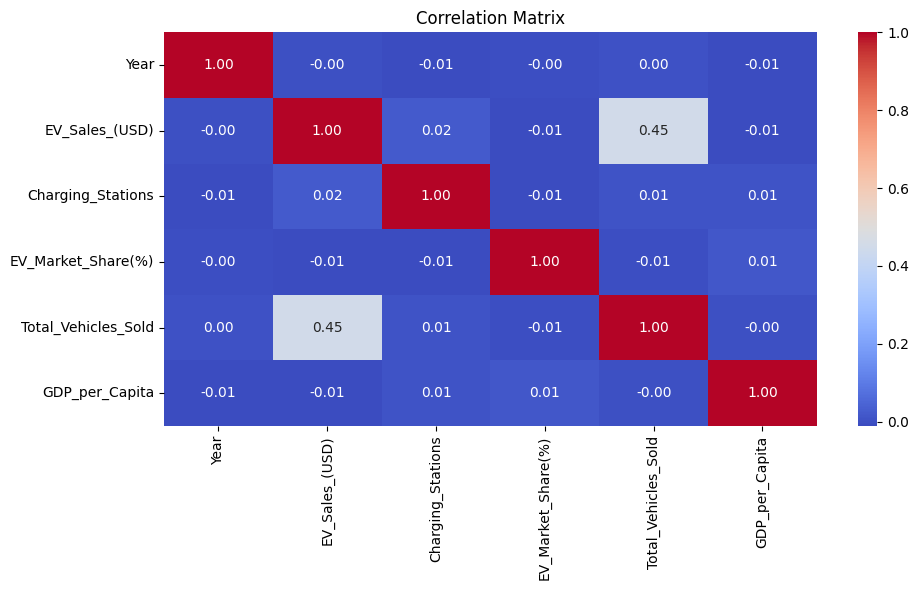

In [68]:
# Correlation heatmap for numeric variables
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


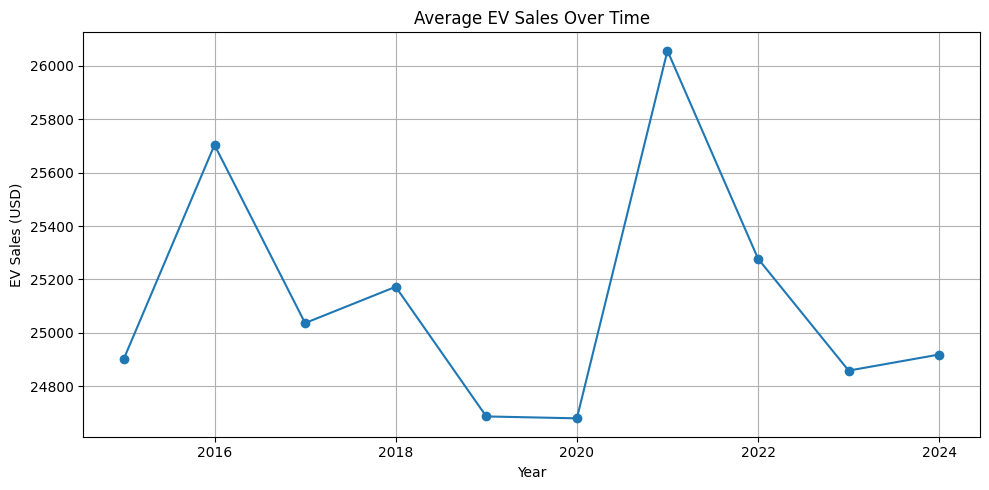

In [69]:
# Average EV sales per year
ev_sales_by_year = df.groupby('Year')['EV_Sales_(USD)'].mean()

ev_sales_by_year.plot(kind='line', marker='o', figsize=(10,5), title='Average EV Sales Over Time')
plt.ylabel('EV Sales (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


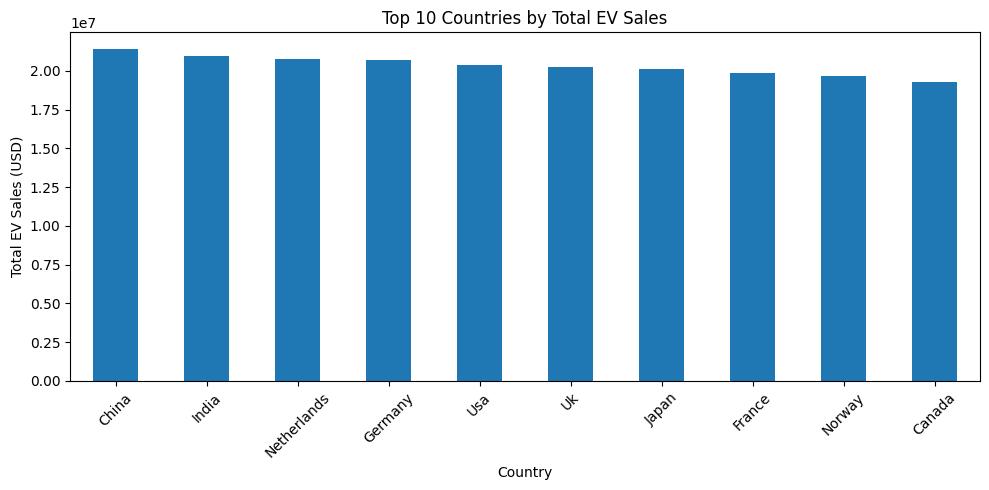

In [70]:
#Top 10 Countries by Total EV Sales
top_countries = df.groupby('Country')['EV_Sales_(USD)'].sum().nlargest(10)

top_countries.plot(kind='bar', figsize=(10,5), title='Top 10 Countries by Total EV Sales')
plt.ylabel('Total EV Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


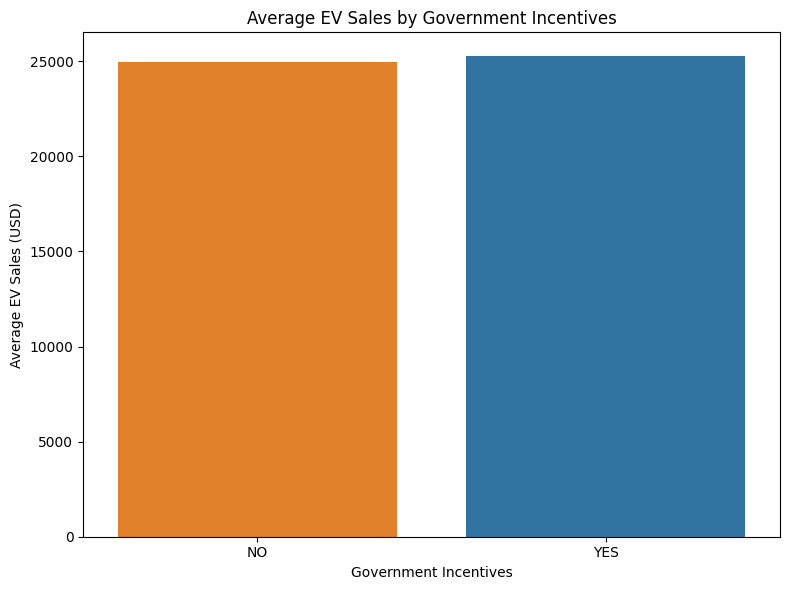

In [71]:
 #Average EV Sales by Government Incentives

plt.figure(figsize=(8,6))
avg_sales = df.groupby('Govt_Incentives')['EV_Sales_(USD)'].mean().reset_index()

# Use exact keys as in your data (uppercase)
colors = {'YES': '#1f77b4', 'NO': '#ff7f0e'}

sns.barplot(
    x='Govt_Incentives',
    y='EV_Sales_(USD)',
    hue='Govt_Incentives',
    data=avg_sales,
    palette=colors,
    dodge=False,
    legend=False
)

plt.title("Average EV Sales by Government Incentives")
plt.xlabel("Government Incentives")
plt.ylabel("Average EV Sales (USD)")
plt.tight_layout()
plt.show()



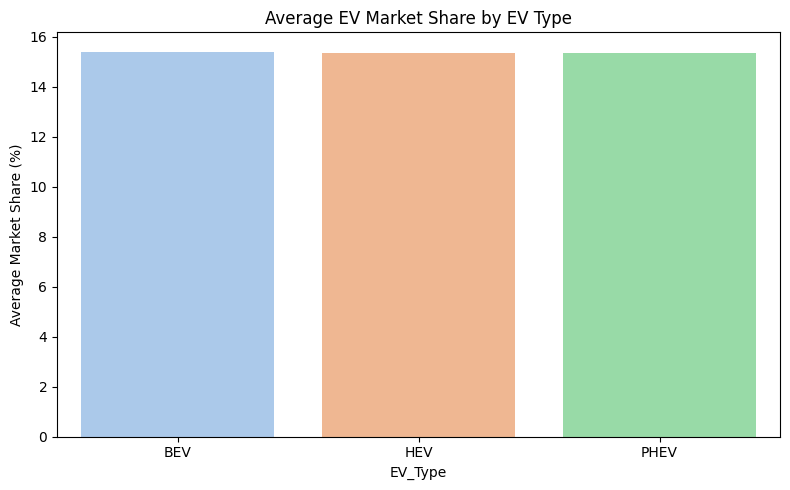

In [72]:
# EV Market Share by EV Type
plt.figure(figsize=(8,5))
sns.barplot(
    x='EV_Type',
    y='EV_Market_Share(%)',
    data=df,
    estimator='mean',
    errorbar=None,
    hue='EV_Type',
    palette='pastel',
    legend=False
)
plt.title("Average EV Market Share by EV Type")
plt.ylabel("Average Market Share (%)")
plt.tight_layout()
plt.show()


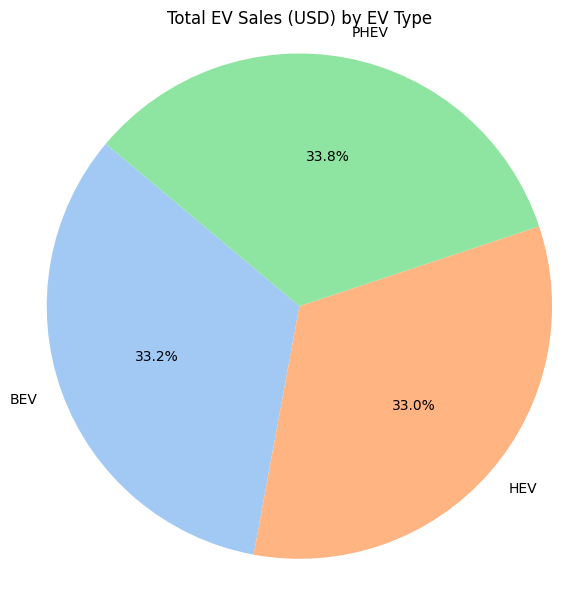

In [73]:
# Grouping by EV Type and summing the sales
ev_sales_by_type = df.groupby('EV_Type')['EV_Sales_(USD)'].sum()

# Plotting pie chart
plt.figure(figsize=(6,6))
plt.pie(ev_sales_by_type, labels=ev_sales_by_type.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Total EV Sales (USD) by EV Type")
plt.axis('equal')  # Ensures pie chart is circular
plt.tight_layout()
plt.show()

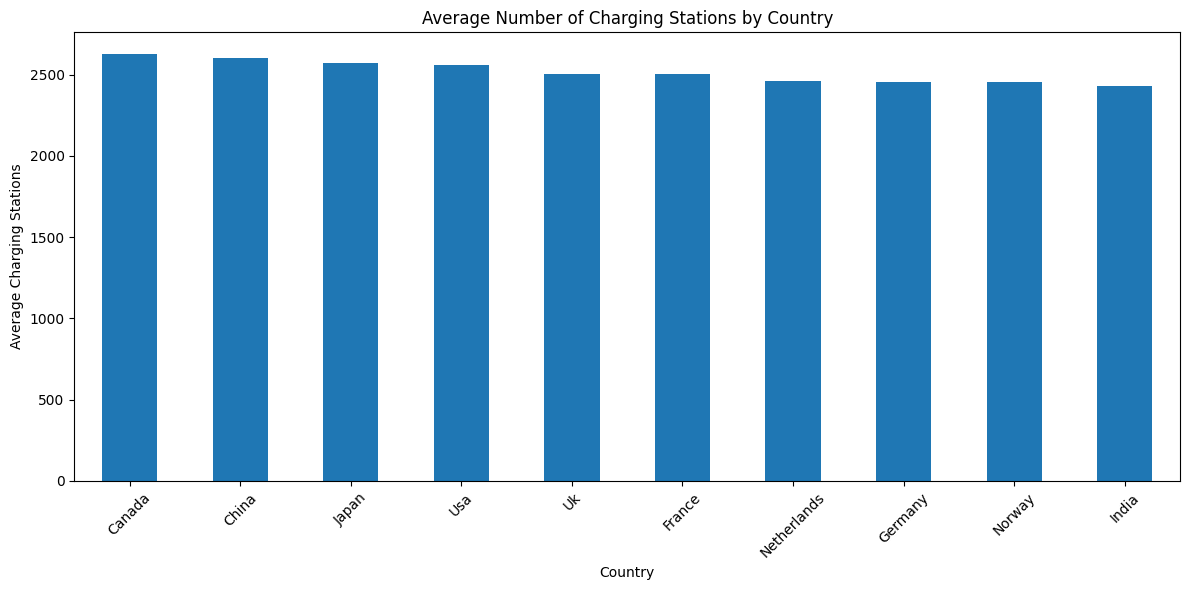

In [74]:
# Average Charging Stations by Country
charging_stations_by_country = df.groupby('Country')['Charging_Stations'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
charging_stations_by_country.plot(kind='bar')
plt.title("Average Number of Charging Stations by Country")
plt.ylabel("Average Charging Stations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



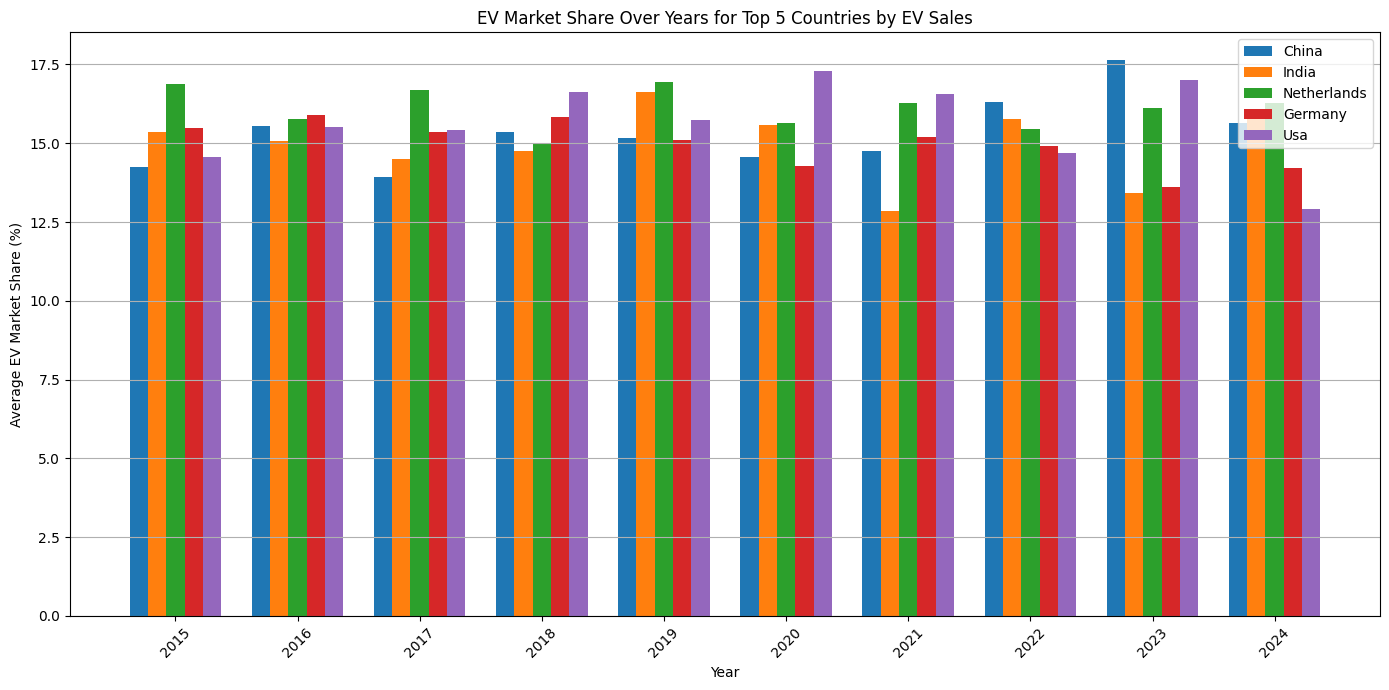

In [75]:
# Top 5 countries by total EV sales
top_5_countries = df.groupby('Country')['EV_Sales_(USD)'].sum().nlargest(5).index.tolist()

# Filter data for these countries
filtered_df = df[df['Country'].isin(top_5_countries)]

# Pivot table to get mean EV Market Share per country per year
pivot_df = filtered_df.pivot_table(index='Year', columns='Country', values='EV_Market_Share(%)', aggfunc='mean')

# Plot grouped bar chart
years = pivot_df.index.tolist()
num_years = len(years)
num_countries = len(top_5_countries)

bar_width = 0.15
x = np.arange(num_years)  # positions for groups (years)

plt.figure(figsize=(14,7))

for i, country in enumerate(top_5_countries):
    plt.bar(x + i*bar_width, pivot_df[country], width=bar_width, label=country)

plt.xlabel('Year')
plt.ylabel('Average EV Market Share (%)')
plt.title('EV Market Share Over Years for Top 5 Countries by EV Sales')
plt.xticks(x + bar_width*(num_countries-1)/2, years, rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()



RMSE: 30983.29 vehicles
Country with highest predicted vehicle sales in 2034: Japan with 76467 vehicles
Country with highest predicted revenue in 2034: Japan with $48,084.28


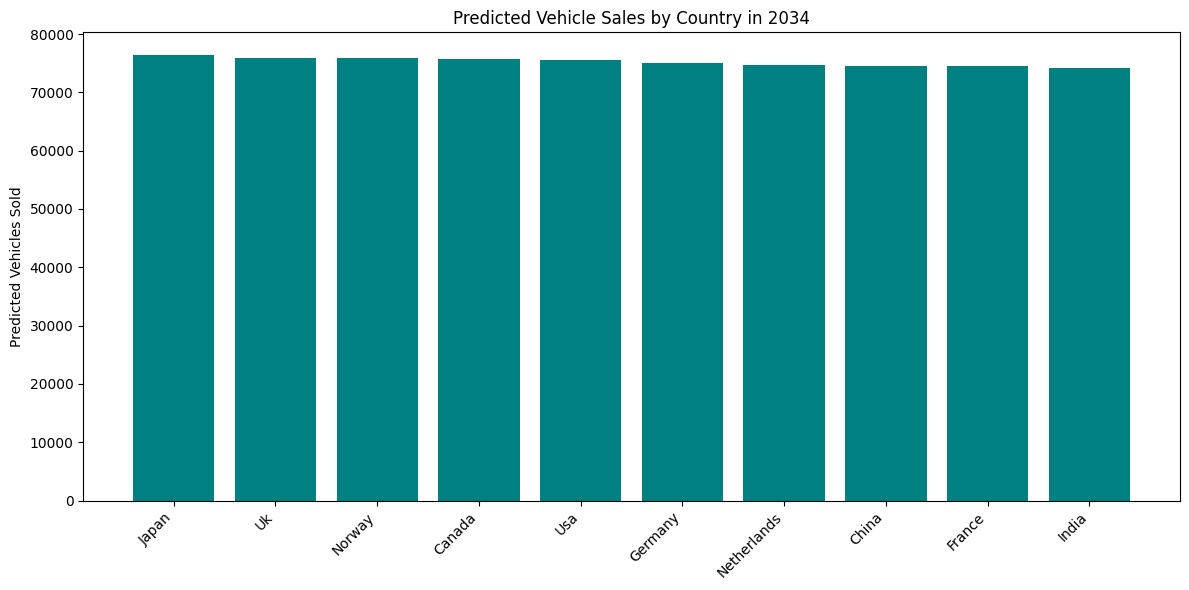

In [76]:
# Define features
features = ['Charging_Stations', 'EV_Market_Share(%)', 'GDP_per_Capita']

X = df[features]
y = df['Total_Vehicles_Sold']  # Target is now number of vehicles sold

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set and evaluate
y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f} vehicles')

# Define future years for prediction
future_years = list(range(df['Year'].max() + 1, df['Year'].max() + 11))
countries = df['Country'].unique()

# Define simple annual growth rates for features
growth_rates = {
    'Charging_Stations': 0.10,       # 10% annual growth
    'EV_Market_Share(%)': 0.05,      # 5% annual growth
    'GDP_per_Capita': 0.03            # 3% annual growth
}

# Calculate average revenue per vehicle per country
avg_revenue_per_vehicle = df.groupby('Country').apply(
    lambda x: (x['EV_Sales_(USD)'] / x['Total_Vehicles_Sold']).iloc[-1], include_groups=False
).to_dict()

# Fallback global average revenue per vehicle in case country data missing
global_avg_revenue_per_vehicle = df['EV_Sales_(USD)'].sum() / df['Total_Vehicles_Sold'].sum()

future_predictions = []

for country in countries:
    latest_data = df[df['Country'] == country].sort_values('Year').iloc[-1]

    base_features = {
        'Charging_Stations': latest_data['Charging_Stations'],
        'EV_Market_Share(%)': latest_data['EV_Market_Share(%)'],
        'GDP_per_Capita': latest_data['GDP_per_Capita']
    }

    for i, year in enumerate(future_years):
        updated_features = {
            feature: base_features[feature] * ((1 + growth_rates[feature]) ** i)
            for feature in base_features
        }

        X_future = pd.DataFrame([updated_features])
        predicted_vehicles_sold = model.predict(X_future)[0]

        revenue_per_vehicle = avg_revenue_per_vehicle.get(country, global_avg_revenue_per_vehicle)
        predicted_revenue = predicted_vehicles_sold * revenue_per_vehicle

        future_predictions.append({
            'Country': country,
            'Year': year,
            'Predicted_Vehicles_Sold': predicted_vehicles_sold,
            'Predicted_Revenue_USD': predicted_revenue
        })

future_df = pd.DataFrame(future_predictions)

# Identify country with highest predicted vehicle sales in last future year
last_year = future_years[-1]
max_sales_data = future_df[future_df['Year'] == last_year].sort_values('Predicted_Vehicles_Sold', ascending=False).iloc[0]
print(f"Country with highest predicted vehicle sales in {last_year}: {max_sales_data['Country']} with {max_sales_data['Predicted_Vehicles_Sold']:.0f} vehicles")

# Identify country with highest predicted revenue in last future year
max_revenue_data = future_df[future_df['Year'] == last_year].sort_values('Predicted_Revenue_USD', ascending=False).iloc[0]
print(f"Country with highest predicted revenue in {last_year}: {max_revenue_data['Country']} with ${max_revenue_data['Predicted_Revenue_USD']:,.2f}")

# Plot predicted vehicle sales by country for last future year
plt.figure(figsize=(12,6))
data_to_plot = future_df[future_df['Year'] == last_year].sort_values('Predicted_Vehicles_Sold', ascending=False)
plt.bar(data_to_plot['Country'], data_to_plot['Predicted_Vehicles_Sold'], color='teal')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Predicted Vehicles Sold')
plt.title(f'Predicted Vehicle Sales by Country in {last_year}')
plt.tight_layout()
plt.show()


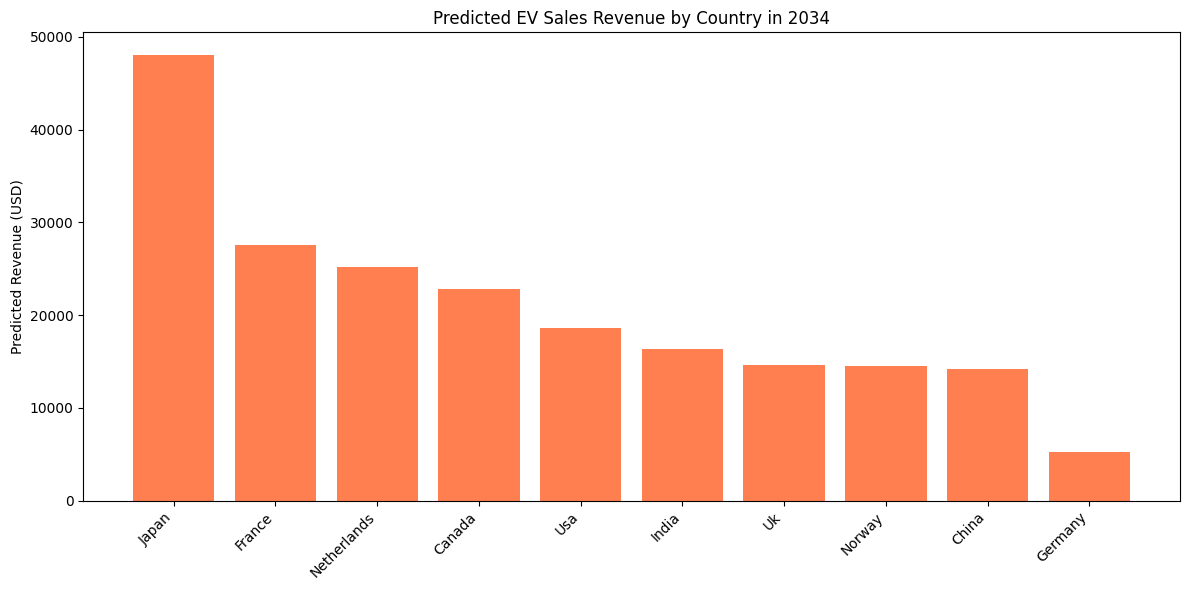

In [77]:
# Plot predicted revenue by country for last future year
plt.figure(figsize=(12,6))
data_to_plot_rev = future_df[future_df['Year'] == last_year].sort_values('Predicted_Revenue_USD', ascending=False)
plt.bar(data_to_plot_rev['Country'], data_to_plot_rev['Predicted_Revenue_USD'], color='coral')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Predicted Revenue (USD)')
plt.title(f'Predicted EV Sales Revenue by Country in {last_year}')
plt.tight_layout()
plt.show()